<a href="https://colab.research.google.com/github/Gayathri5Chinda/Accident-Severity-Prediction/blob/main/mlmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# import joblib

plt.style.use('ggplot')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Accidents.csv to Accidents.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Casualties.csv to Casualties.csv


In [9]:
from google.colab import files
uploaded = files.upload()

Saving Vehicles.csv to Vehicles.csv


In [10]:
from google.colab import drive
import pandas as pd

# Mount Google Drive (keeping this in case you need it later, but not strictly for these files)
drive.mount('/content/drive')

# Access files (adjust path to where you saved them in Drive)
# The files were uploaded directly to Colab, so they are in the /content/ directory.
accidents = pd.read_csv('/content/Accidents.csv',
                        index_col='Accident_Index', low_memory=False)
casualties = pd.read_csv('/content/Casualties.csv',
                         index_col='Accident_Index', low_memory=False)
vehicles = pd.read_csv('/content/Vehicles.csv',
                       index_col='Accident_Index', low_memory=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,...,0,5,1,1,1,0,0,1,3,E01004762
2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,...,-1,-1,4,1,1,0,0,1,3,E01003117
2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,3,...,0,0,4,1,1,0,0,1,1,E01000943
2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,3,...,0,0,4,1,1,0,0,1,1,E01000973
2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,3,...,0,0,4,1,1,0,0,1,1,E01000546


In [12]:
casualties.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
Accident_Index,,,,,,,,,,,,,,,
2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [13]:
vehicles.head()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2019010152270,1,9,0,18,-1,0,-1,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
2019010152270,2,9,0,18,-1,0,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
2019010155191,1,9,0,3,0,1,0,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


In [15]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123178 entries, 2019010155425 to 201998QC01004
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   Vehicle_Reference                 123178 non-null  int64
 1   Vehicle_Type                      123178 non-null  int64
 2   Towing_and_Articulation           123178 non-null  int64
 3   Vehicle_Manoeuvre                 123178 non-null  int64
 4   Vehicle_Location-Restricted_Lane  123178 non-null  int64
 5   Junction_Location                 123178 non-null  int64
 6   Skidding_and_Overturning          123178 non-null  int64
 7   Hit_Object_in_Carriageway         123178 non-null  int64
 8   Vehicle_Leaving_Carriageway       123178 non-null  int64
 9   Hit_Object_off_Carriageway        123178 non-null  int64
 10  1st_Point_of_Impact               123178 non-null  int64
 11  Was_Vehicle_Left_Hand_Drive?      123178 non-null  int64
 12  Jo

In [16]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122547 entries, 2019010155425 to 201998QC01004
Data columns (total 47 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Longitude                                    122547 non-null  float64       
 1   Latitude                                     122547 non-null  float64       
 2   Police_Force                                 122547 non-null  float64       
 3   Accident_Severity                            122547 non-null  float64       
 4   Number_of_Vehicles                           122547 non-null  float64       
 5   Number_of_Casualties                         122547 non-null  float64       
 6   Day_of_Week                                  122547 non-null  float64       
 7   Local_Authority_(District)                   122547 non-null  float64       
 8   Local_Authority_(Highway)                    12254

In [18]:
casualties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133198 entries, 2019010128300 to 201998QC01004
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Vehicle_Reference        133198 non-null  int64
 1   Casualty_Reference       133198 non-null  int64
 2   Casualty_Class           133198 non-null  int64
 3   Sex_of_Casualty          133198 non-null  int64
 4   Age_of_Casualty          133198 non-null  int64
 5   Age_Band_of_Casualty     133198 non-null  int64
 6   Casualty_Severity        133198 non-null  int64
 7   Pedestrian_Location      133198 non-null  int64
 8   Pedestrian_Movement      133198 non-null  int64
 9   Car_Passenger            133198 non-null  int64
 10  Bus_or_Coach_Passenger   133198 non-null  int64
 11  Casualty_Type            133198 non-null  int64
 12  Casualty_Home_Area_Type  133198 non-null  int64
 13  Casualty_IMD_Decile      133198 non-null  int64
dtypes: int64(14)
memory us

In [23]:
#Which features are available in the dataset?
casualties.columns


Index(['Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')

In [25]:
accidents.columns


Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Date_time', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
   

In [26]:
vehicles.columns

Index(['Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile'],
      dtype='object')

In [27]:
vehicles.isnull().sum()

,0
Vehicle_Reference,0
Vehicle_Type,0
Towing_and_Articulation,0
Vehicle_Manoeuvre,0
Vehicle_Location-Restricted_Lane,0
Junction_Location,0
Skidding_and_Overturning,0
Hit_Object_in_Carriageway,0
Vehicle_Leaving_Carriageway,0
Hit_Object_off_Carriageway,0


In [29]:
casualties.isnull().sum()


,0
Vehicle_Reference,0
Casualty_Reference,0
Casualty_Class,0
Sex_of_Casualty,0
Age_of_Casualty,0
Age_Band_of_Casualty,0
Casualty_Severity,0
Pedestrian_Location,0
Pedestrian_Movement,0
Car_Passenger,0


In [30]:
accidents.isnull().sum()

,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Day_of_Week,0
Local_Authority_(District),0
Local_Authority_(Highway),0
1st_Road_Class,0


In [34]:
accidents.describe(include='all')

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
count,122547.000000,122547.000000,122547.000000,122547.000000,122547.000000,122547.000000,122547.000000,122547.000000,122547,122547.000000,...,122547.000000,122547.000000,122547.000000,122547.000000,122547.000000,122547.000000,122547.000000,122547.000000,122547.000000,122547.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E10000016,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4476,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-1.334006,52.421840,31.413523,2.766188,2.119921,1.451557,4.119840,362.700262,NaN,4.049140,...,4.484818,1.341893,41.771312,7.045436,1845.696884,1.603344,8.261157,5.160673,1.343354,5.160673
min,-7.394615,49.917760,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,...,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-2.260469,51.439453,11.000000,3.000000,2.000000,1.000000,2.000000,148.000000,NaN,3.000000,...,2.000000,1.000000,28.000000,6.000000,1242.000000,1.000000,4.000000,3.000000,1.000000,3.000000
50%,-1.276176,52.024952,32.000000,3.000000,2.000000,1.000000,4.000000,354.000000,NaN,3.000000,...,6.000000,1.000000,39.000000,7.000000,1596.000000,1.000000,8.000000,5.000000,1.000000,5.000000
75%,-0.180461,53.394361,46.000000,3.000000,2.000000,2.000000,6.000000,539.000000,NaN,6.000000,...,6.000000,2.000000,53.000000,8.000000,1994.000000,2.000000,12.000000,8.000000,1.000000,8.000000
max,1.757476,60.343852,98.000000,3.000000,17.000000,52.000000,7.000000,941.000000,NaN,6.000000,...,6.000000,3.000000,102.000000,11.000000,29980.000000,12.000000,94.000000,10.000000,3.000000,10.000000


In [20]:
casualties.describe(include='all')

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000,133198.000000
mean,1.468648,1.369998,1.468813,1.401665,38.046292,6.516855,2.808406,0.741408,0.583605,0.224666,0.057276,7.098417,1.299254,4.978220
std,0.607533,2.964683,0.726264,0.490237,19.098999,2.236932,0.420041,2.092702,1.890241,0.543531,0.456901,7.650616,0.650762,2.796511
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,23.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
50%,1.000000,1.000000,1.000000,1.000000,35.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2.000000,1.000000,2.000000,2.000000,51.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,20.000000,991.000000,3.000000,2.000000,102.000000,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,98.000000,3.000000,10.000000


In [33]:
vehicles.describe(include='all')

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
count,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,...,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000,123178.000000
mean,1.522739,9.554417,0.024663,12.792512,0.126005,2.234328,0.233694,0.358116,0.407743,0.526441,...,4.487189,1.341936,41.768668,7.045154,1845.175632,1.603257,8.259957,5.158778,1.343219,5.158778
std,0.726867,5.032440,0.280348,6.069353,0.972007,2.989929,0.837053,1.699153,1.444004,2.069842,...,1.986196,0.479264,16.796391,1.790153,1607.544717,1.127700,5.445160,2.802714,0.689460,2.802714
min,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,9.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,28.000000,6.000000,1242.000000,1.000000,4.000000,3.000000,1.000000,3.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,1.000000,39.000000,7.000000,1596.000000,1.000000,8.000000,5.000000,1.000000,5.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,2.000000,53.000000,8.000000,1993.000000,2.000000,12.000000,8.000000,1.000000,8.000000
max,20.000000,90.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,6.000000,3.000000,102.000000,11.000000,29980.000000,12.000000,94.000000,10.000000,3.000000,10.000000


In [36]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'LSOA_of_Accident_Location',
                'Junction_Control', '2nd_Road_Class'], axis=1, inplace=True, errors='ignore')
casualties.drop('Pedestrian_Road_Maintenance_Worker', axis=1, inplace=True, errors='ignore')

# Check if 'Date' and 'Time' columns exist before attempting to combine them
if 'Date' in accidents.columns and 'Time' in accidents.columns:
    accidents['Date_time'] = accidents['Date'] + ' ' + accidents['Time']
    accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
    accidents.drop(['Date', 'Time'], axis=1, inplace=True, errors='ignore')
else:
    print("Date or Time columns not found, skipping date_time creation and drop.")

# Apply filtering for -1 values in a more robust way
def filter_minus_one(df):
    for col in df.columns:
        if -1 in df[col].unique(): # Check if -1 exists in the column
            df = df[df[col] != -1]
    return df

accidents = filter_minus_one(accidents)
casualties = filter_minus_one(casualties)
vehicles = filter_minus_one(vehicles)

# Re-check the accidents DataFrame columns before joining to avoid potential issues if it was already joined
# Also, ensure 'Accident_Index' is the index for all dataframes if they are to be joined on it implicitly.
# Assuming 'Accident_Index' is still the index for all dataframes.

# It appears from the original accidents.info() that some vehicle-related columns are already present.
# This might indicate a previous join or that `accidents` already contains some vehicle data.
# If `accidents` already has vehicle data, the outer join below might create duplicate columns or unexpected behavior.
# For now, let's proceed with the original join logic, but keep this in mind for debugging if issues arise.

# Ensure that the 'Accident_Index' is the index of both dataframes before joining.
# From the info() calls, they already are.
accidents = accidents.join(vehicles, how='outer', rsuffix='_vehicle')

accidents.dropna(inplace=True)


Date or Time columns not found, skipping date_time creation and drop.


Text(0.5, 0, '0 - Sunday, 1-Monday, 2 - Tuesday, 3 - Wednesday, 4 - Thursday, 5 - Friday, 6 - Saturday')

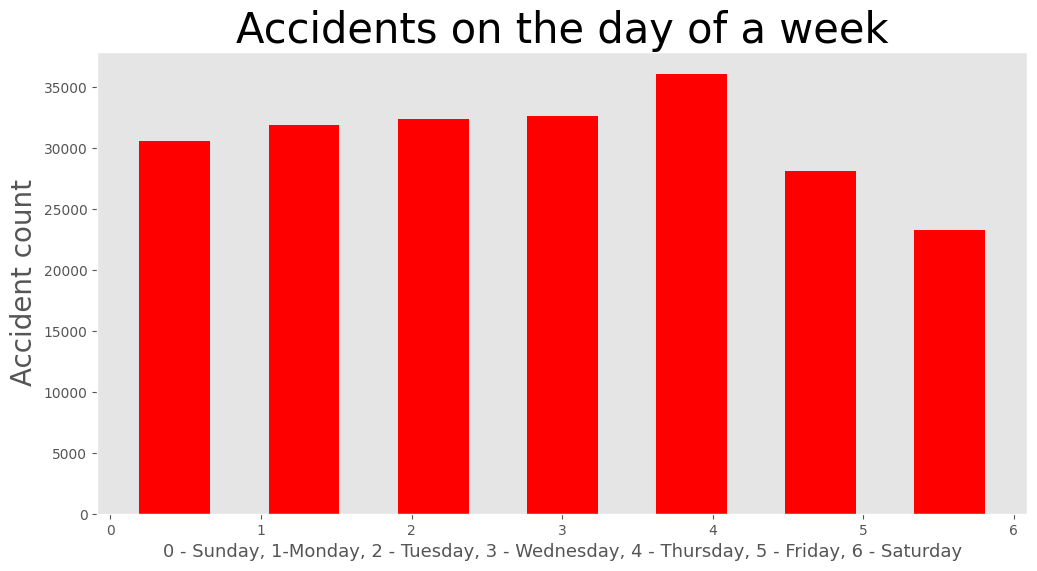

In [37]:
# plot for accidents on the days of a week
plt.figure(figsize=(12, 6))
accidents.Date_time.dt.dayofweek.hist(bins=7, rwidth=0.55, color='red')
plt.title("Accidents on the day of a week", fontsize=30)
plt.grid(False)
plt.ylabel('Accident count', fontsize=20)
plt.xlabel('0 - Sunday, 1-Monday, 2 - Tuesday, 3 - Wednesday, 4 - Thursday, 5 - Friday, 6 - Saturday', fontsize=13)


Text(0, 0.5, 'Accident count')

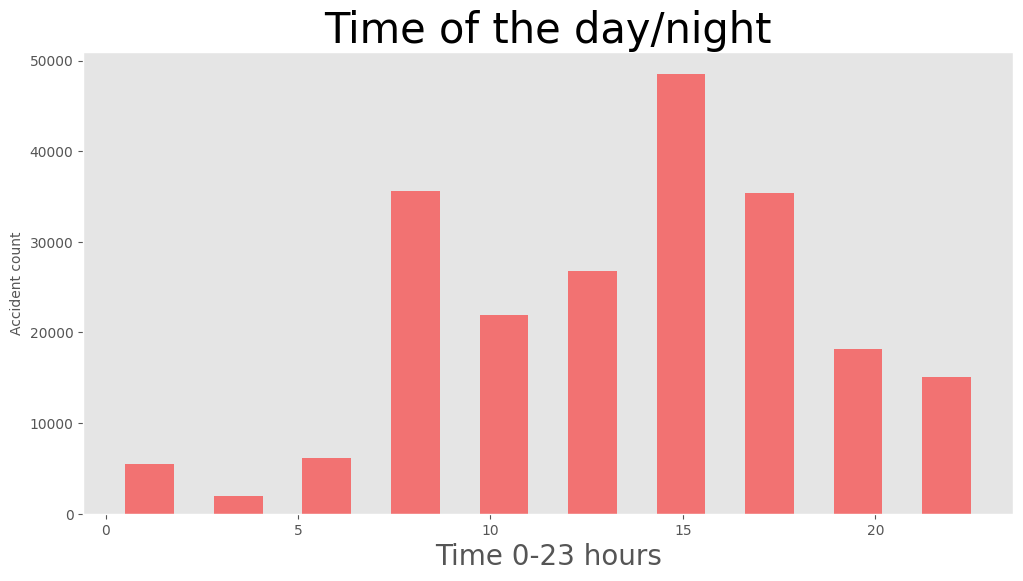

In [38]:
# plot for accidents on the hours of a day
plt.figure(figsize=(12, 6))
accidents.Date_time.dt.hour.hist(rwidth=0.55, alpha=0.50, color='red')
plt.title("Time of the day/night", fontsize=30)
plt.grid(False)
plt.xlabel('Time 0-23 hours', fontsize=20)
plt.ylabel('Accident count', fontsize=10)

Text(0, 0.5, 'Accident count')

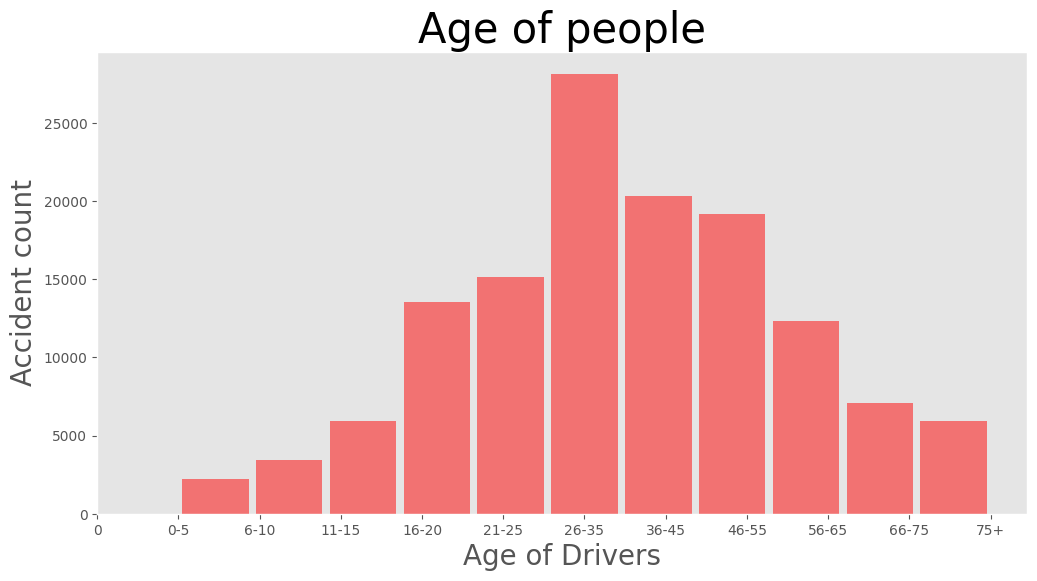

In [39]:
# plot for accidents of different age bands
objects = ['0', '0-5', '6-10', '11-15', '16-20', '21-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']
plt.figure(figsize=(12, 6))
casualties.Age_Band_of_Casualty.hist(bins=11, rwidth=0.90, alpha=0.50, color='red')
plt.title("Age of people", fontsize=30)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
plt.xlabel('Age of Drivers', fontsize=20)
plt.ylabel('Accident count', fontsize=20)

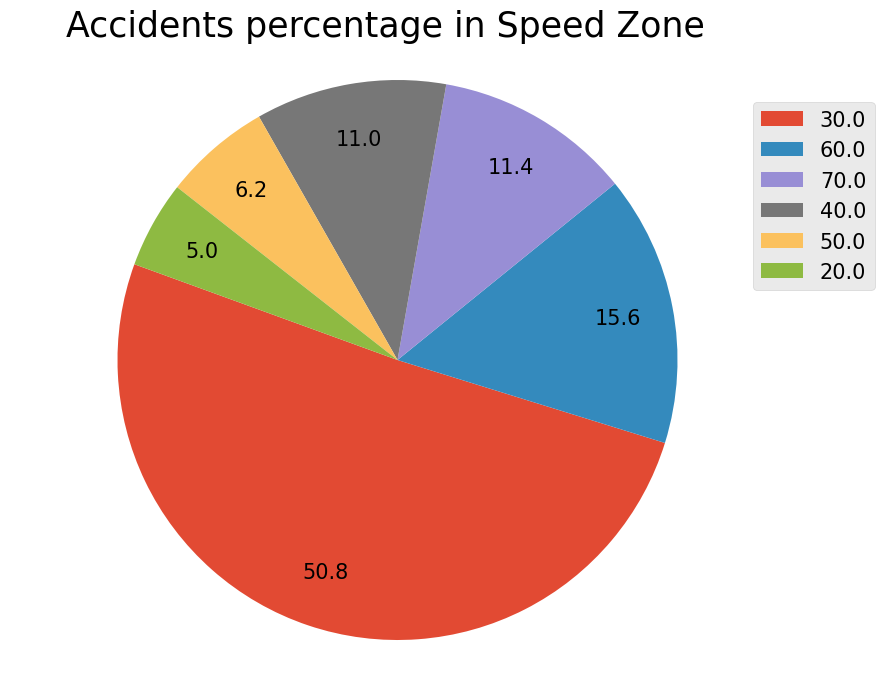

In [41]:
#speed zone accidents
speed_zone_accidents = accidents.loc[accidents['Speed_limit'].isin([20, 30, 40, 50, 60, 70])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

# The 'explode' tuple needs to have the same length as the number of unique speed limit values.
# We will dynamically create 'explode' based on the 'speed' Series.
# If speed is empty, there's no data to plot, so handle that case.
if not speed.empty:
    explode = [0.0] * len(speed)
    plt.figure(figsize=(10,8))
    plt.pie(speed.values,  labels=None,
             autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
    plt.axis('equal')
    plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15,
                bbox_transform=plt.gcf().transFigure)
    plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
    plt.show()
else:
    print("No speed zone accident data available to plot after filtering.")

In [42]:
# Required Datasets
accident_ml = accidents.drop('Accident_Severity', axis=1)
accident_ml = accident_ml[['Age_of_Driver', 'Vehicle_Type', 'Engine_Capacity_(CC)', 'Day_of_Week', 'Weather_Conditions',
                           'Road_Surface_Conditions', 'Age_of_Vehicle', 'Light_Conditions', 'Sex_of_Driver',
                           'Speed_limit']]


In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, accidents['Accident_Severity'].values,
                                                    test_size=0.20, random_state=99)


In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [48]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

In [49]:
# Predicting a new result
print(classifier.predict([[20, 5, 599, 1, 1, 1, 9, 4, 1, 30]]))


[2.]


In [50]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))


[[3. 3.]
 [3. 2.]
 [3. 3.]
 ...
 [3. 3.]
 [3. 2.]
 [3. 3.]]


In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[  521    21   202]
 [    6  5569  2864]
 [   15   588 33220]]


0.9140585034646328

In [52]:
# # Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression(random_state=0)
classifier_logistic.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [53]:
# # Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_decision = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_decision.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)